# Gender Voice Determination (Male or Female) Based on Voice Cahrac

## 0. Introduction

With human hearing ability most of the times we correctly guess the gender of a person. If we want computer to do the same task is little challenging. In this activity we are attempting to develop a model which will guess the gender based once voice- characteristics.
##### About Dataset: 
This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the see wave and tuneR packages, with an analyzed frequency range of 0hz-280hz.
https://www.mldata.io/dataset-details/gender_voice/

#### Our aim: 
We want to develop a model which will tell us the gender of a person by analyzing voice cahrac.

#### This will be my Workflow for the project: 
- Gathering data
- Data pre-processing
- Researching the model that will be best for the type of data
- Training and testing the model
- Evaluation

### 1. Importing dataset

### 1.1 Importing basic libraries 

In [31]:
#Import initial libraries
import numpy as np
import pandas as pd

# Libraries for plotting
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.tools as tls
import plotly.figure_factory as ff

# Import time
import time

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 
style_dict = {'background-color':'lightyellow','color':'#000000','border-color': 'red','font-family':'Roboto'}

### 1.2  Load The Dataset From Local Directory

In [32]:
# Load the dataset. Data sourse https://www.mldata.io/dataset-details/gender_voice/#
data = pd.read_csv("data.csv", sep=',')
# First three rows of the dataset:
data.head(10).style.set_properties(**style_dict)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.0642413,0.0320269,0.0150715,0.0901934,0.075122,12.8635,274.403,0.893369,0.491918,0,0.059781,0.0842791,0.0157017,0.275862,0.0078125,0.0078125,0.0078125,0,0,male
1,0.0660087,0.06731,0.0402287,0.0194139,0.0926662,0.0732523,22.4233,634.614,0.892193,0.513724,0,0.0660087,0.107937,0.0158259,0.25,0.00901442,0.0078125,0.0546875,0.046875,0.0526316,male
2,0.0773155,0.0838294,0.0367185,0.00870106,0.131908,0.123207,30.7572,1024.93,0.846389,0.478905,0,0.0773155,0.0987063,0.0156556,0.271186,0.00799006,0.0078125,0.015625,0.0078125,0.0465116,male
3,0.151228,0.0721106,0.158011,0.0965817,0.207955,0.111374,1.23283,4.1773,0.963322,0.727232,0.0838782,0.151228,0.0889648,0.0177976,0.25,0.201497,0.0078125,0.5625,0.554688,0.247119,male
4,0.13512,0.0791461,0.124656,0.0787202,0.206045,0.127325,1.10117,4.33371,0.971955,0.783568,0.104261,0.13512,0.106398,0.0169312,0.266667,0.712812,0.0078125,5.48438,5.47656,0.208274,male
5,0.132786,0.0795569,0.11909,0.067958,0.209592,0.141634,1.93256,8.3089,0.963181,0.738307,0.112555,0.132786,0.110132,0.0171123,0.253968,0.298222,0.0078125,2.72656,2.71875,0.12516,male
6,0.150762,0.0744632,0.160106,0.0928989,0.205718,0.112819,1.53064,5.9875,0.967573,0.762638,0.0861968,0.150762,0.105945,0.0262295,0.266667,0.47962,0.0078125,5.3125,5.30469,0.123992,male
7,0.160514,0.0767669,0.144337,0.110532,0.231962,0.12143,1.39716,4.76661,0.959255,0.719858,0.128324,0.160514,0.0930524,0.017758,0.144144,0.301339,0.0078125,0.539062,0.53125,0.283937,male
8,0.142239,0.0780185,0.138587,0.0882063,0.208587,0.120381,1.09975,4.07028,0.970723,0.770992,0.219103,0.142239,0.0967289,0.0179574,0.25,0.336476,0.0078125,2.16406,2.15625,0.148272,male
9,0.134329,0.08035,0.121451,0.07558,0.201957,0.126377,1.19037,4.78731,0.975246,0.804505,0.0116987,0.134329,0.105881,0.0193004,0.262295,0.340365,0.015625,4.69531,4.67969,0.08992,male


##### Label is categorical variable, so we need to change it to numerical format.

In [33]:
# Change 'male'=0 and female = 1
data ['label'] = data.label.map({'male':0, 'female':1})

Data source: [Gender Vice data](https://www.mldata.io/dataset-details/gender_voice/)

**Attribute Information:**

    - duration: length of signal
    - meanfreq: mean frequency (in kHz)
    - sd: standard deviation of frequency
    - median: median frequency (in kHz)
    - Q25: first quantile (in kHz)
    - Q75: third quantile (in kHz)
    - IQR: interquantile range (in kHz)
    - skew: skewness (see note in specprop description)
    - kurt: kurtosis (see note in specprop description)
    - sp.ent: spectral entropy
    - sfm: spectral flatness
    - mode: mode frequency
    - centroid: frequency centroid (see specprop)
    - peakf: peak frequency (frequency with highest energy)
    - meanfun: average of fundamental frequency measured across acoustic signal
    - minfun: minimum fundamental frequency measured across acoustic signal
    - maxfun: maximum fundamental frequency measured across acoustic signal
    - meandom: average of dominant frequency measured across acoustic signal
    - mindom: minimum of dominant frequency measured across acoustic signal
    - maxdom: maximum of dominant frequency measured across acoustic signal
    - dfrange: range of dominant frequency measured across acoustic signal
    - modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

### 2. Data Exploration and Pre-Processing

In [34]:
print("So, we have {} rows with {} columns. The last column- Class variable (0 or 1) is our target variable.".format(
    data.shape[0],data.shape[1]))

So, we have 3168 rows with 21 columns. The last column- Class variable (0 or 1) is our target variable.


###### NO NAs and Null values in the dataset.

In [35]:
#Data information - Statistic of each variable
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,...,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,...,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,...,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,...,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,...,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,...,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,...,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


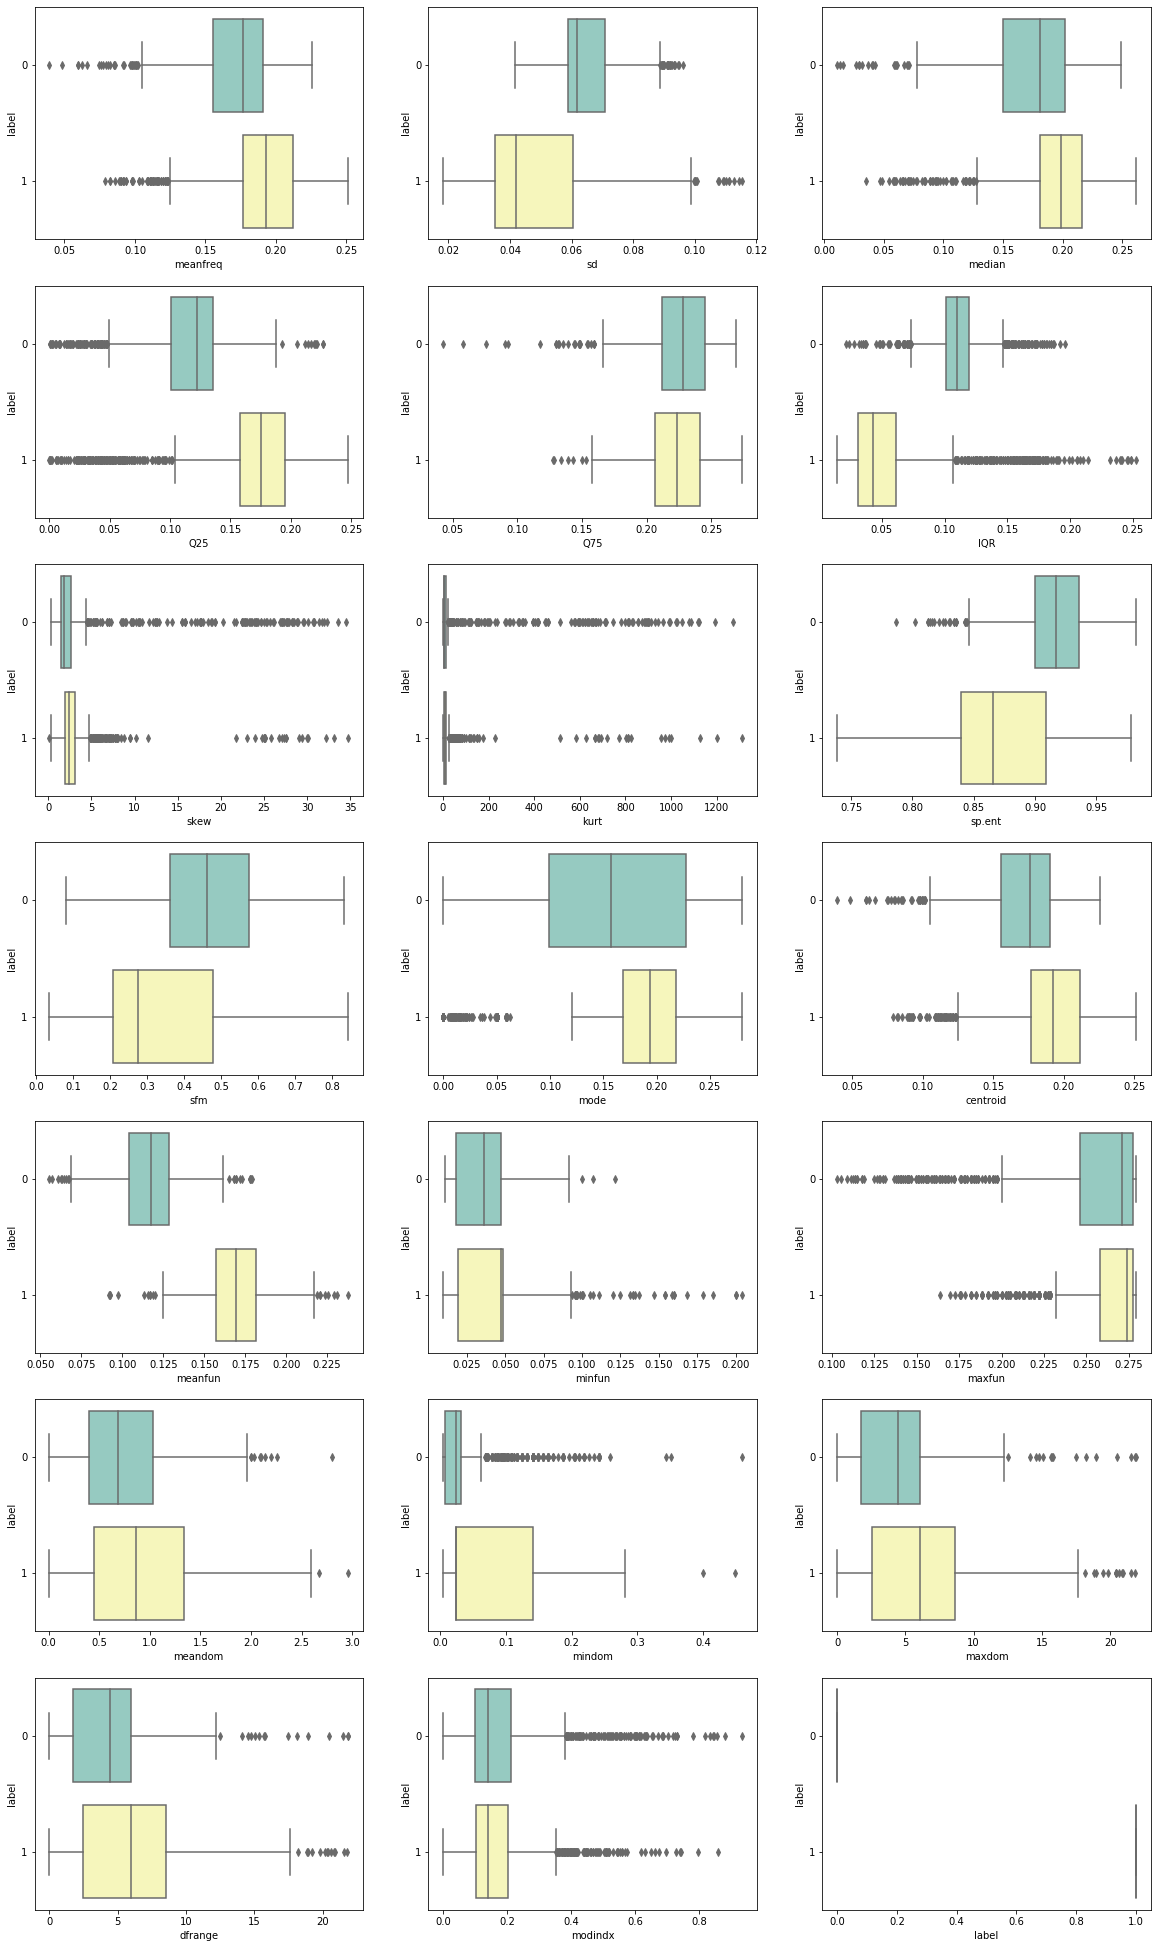

In [13]:
fig, axs = plt.subplots(7,3, figsize=(20, 35))
for i,name in enumerate(data.columns):
    plt.subplot(7, 3, i+1)
    sns.boxplot(x= name, y=data.label, data=data,palette="Set3",orient='h',linewidth=1.5)   
plt.show()

###### Kurt and Skew have mostly zeros.We need to remove them from the dataset.

In [37]:
data = data.drop(['skew', 'kurt'],axis= 1)

In [43]:
#Check the correlation
data.corr()['label'].sort_values()

IQR        -0.618916
sp.ent     -0.490552
sd         -0.479539
sfm        -0.357499
Q75        -0.066906
modindx    -0.030801
minfun      0.136692
maxfun      0.166461
mode        0.171775
meandom     0.191067
dfrange     0.192213
mindom      0.194974
maxdom      0.195657
median      0.283919
meanfreq    0.337415
centroid    0.337415
Q25         0.511455
meanfun     0.833921
label       1.000000
Name: label, dtype: float64

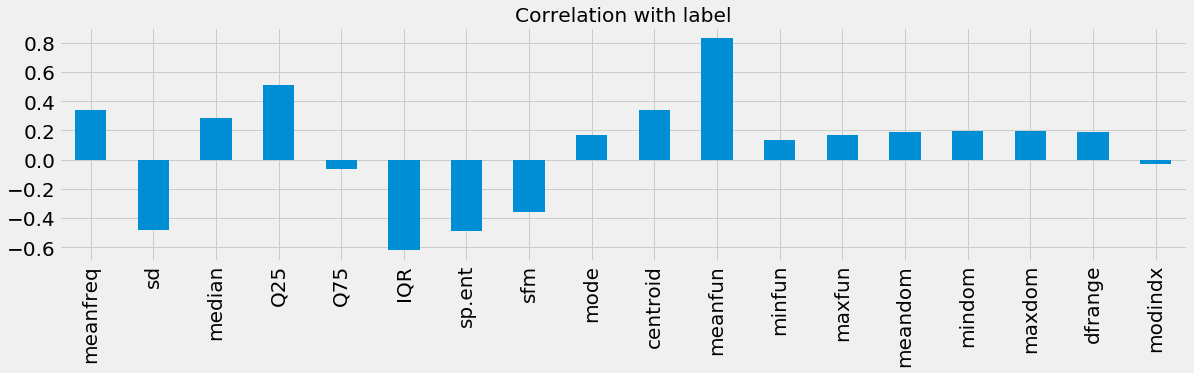

In [39]:
# Relationship between target and features:
#plt.style.use('fivethirtyeight')
plt.style.use('fivethirtyeight')
features = data.drop(['label'],axis=1)
features.corrwith(data['label']).plot.bar(figsize = (18,4), title = "Correlation with label", 
                                        fontsize = 20,rot = 90, grid = True)

##### Above visualizations show that, we can remove some features as there are some features not adding anything in this prediction task.

### 2.1 Divide data in dependent and independent variables

In [26]:
#Split the data in features and target 
X = data.iloc[:,:-1]
y = data.iloc[:,-1] 

# Shuffle the data
from sklearn.utils import shuffle
X, y = shuffle(X, y)

## 3. Researching the model that will be best for the type of data


    -  Import multiple supervised algorithms. 
    -  Train the algorithms 
    -  Check the performances by checking their learning curves, classification report and ROC curve

I have created a classification function - all_in_one, which divides the dataset into three subsets namely,
     1. Training dataset ~ 60% 
     2. Cross Validation dataset ~ 20%
     3. Testing dataset ~20%
     
Also, in this function I have used following classification algorithms to do initial algorithm performance comparison by getting learning curves, classification report and ROC curves.
     1. Logistic Regression Classifier
     2. Decision Tree Classifier
     3. Random Forest Classifier
     4. Support Vector Machine Classifier
     5. Gaussian NB Classifier
     6. K -nearest neighbors Classifier
     7. Gradient Boosting Classifier
     8. Stochastic gradient descent
     9. multilayer perceptron 
     10. Adaboost 

### To get basic understanding of the dataset.

Training Dataset : (1900, 18) (1900,)
Testing Dataset: (634, 18) (634,)
Validation Dataset: (634, 18) (634,)


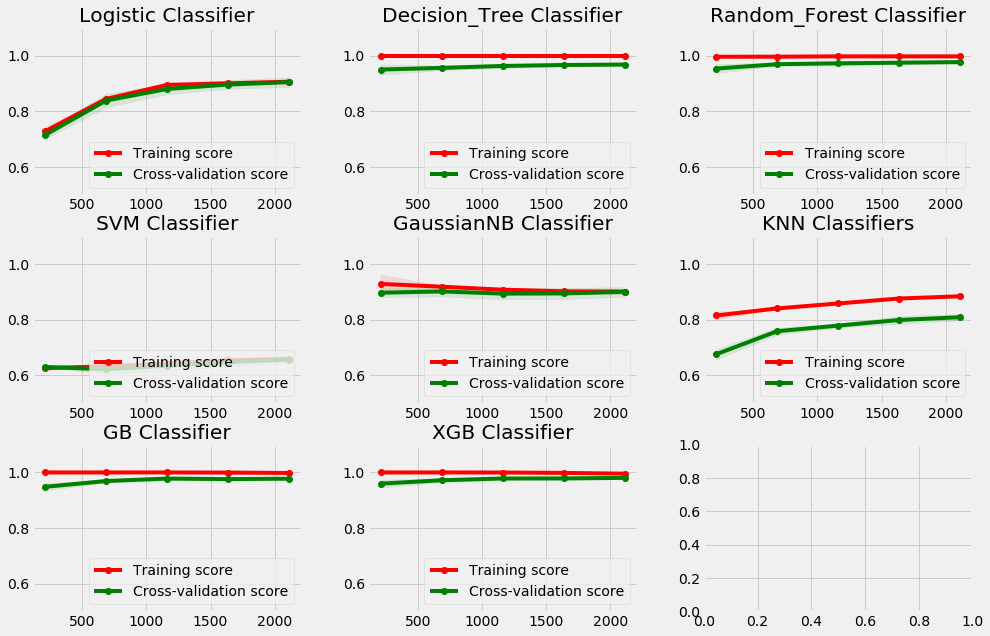

                      Model  Accuracy  Precision    Recall       F1   \
1       Logistic Classifier  0.913249   0.965385  0.845118  0.901257   
2  Decision_Tree Classifier  0.971609   0.960396  0.979798  0.970000   
3  Random_Forest Classifier  0.982650   0.989726  0.973064  0.981324   
4            SVM Classifier  0.670347   0.696429  0.525253  0.598848   
5     GaussianNB Classifier  0.892744   0.901754  0.865320  0.883162   
6           KNN Classifiers  0.812303   0.785256  0.824916  0.804598   
7             GB Classifier  0.979495   0.973333  0.983165  0.978224   
8            XGB Classifier  0.982650   0.973510  0.989899  0.981636   

        ROC      Time  
1  0.909206  0.006629  
2  0.972095  0.013125  
3  0.982081  0.028747  
4  0.661736  0.477918  
5  0.891117  0.001715  
6  0.813051  0.014824  
7  0.979713  0.226300  
8  0.983080  0.167694  




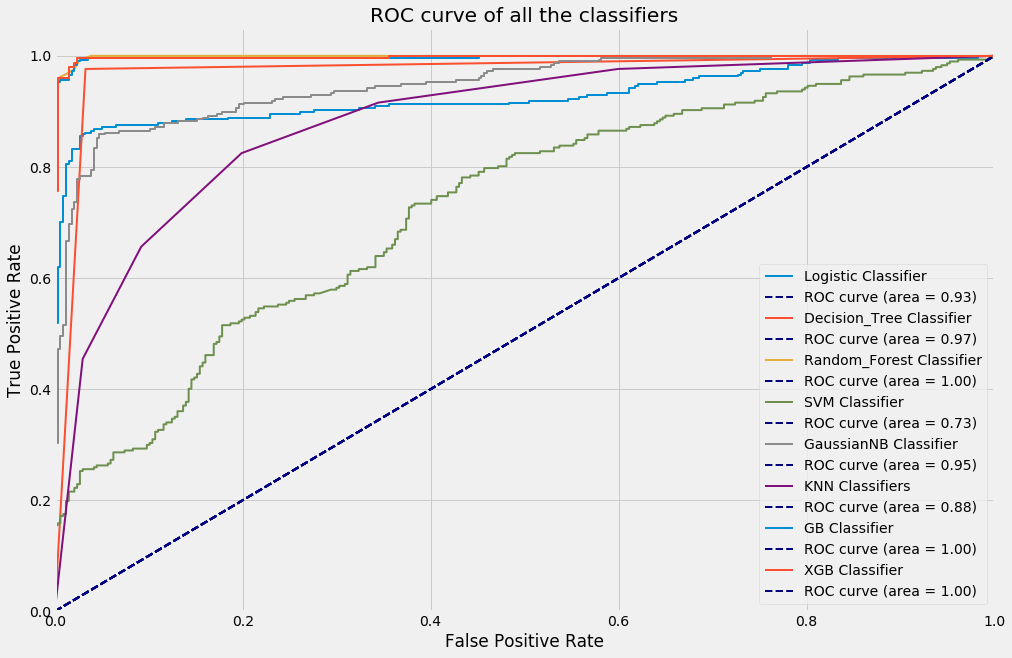

In [42]:
# Import classifiers.py 
import classifiers 

## Run the all in one 
classifiers.all_in_one(X,y)

#### Observations: 
As per above visuals it looks like, most of the estimators are biased Also, SVM, KNN, SGD and MLP  didn't perform well on the dataset, so we will not keep them for our further exploration. 

### Let's use grid search to tune hyper parameters : 

In [15]:
from classifiers import split_my_data
# Splitting the dataset:
X_train, X_val, y_train, y_val, X_test, y_test = split_my_data(X,y)

# Classification Measures 
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix,f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc


Training Dataset : (1900, 18) (1900,)
Testing Dataset: (634, 18) (634,)
Validation Dataset: (634, 18) (634,)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
  
classifiers = {"Decision Tree": DecisionTreeClassifier(),
               "Random Forest":RandomForestClassifier(),
               "XGB": GradientBoostingClassifier(), 
               "MLPClassifier":MLPClassifier(),
               "AdaBoost": AdaBoostClassifier()
              }

In [17]:
# Parameters to Tunned:
params = { "params_dt":{"criterion":['entropy','gini'],"splitter":['best','random'],"max_depth":[10,50,100]},
          "params_rf" : {'n_estimators': [300,350,450],'criterion': ['entropy', 'gini'],
                          'class_weight' : ['balanced']},
          "params_XGB":{},
          "params_mlp":{"activation":['identity','logistic', 'tanh', 'relu']},
          "params_ada":{"learning_rate":np.logspace(0,1,15),'n_estimators': [100, 200,500]}}

# Import  GridSearch for Hyperparameter tunning
from sklearn.model_selection import GridSearchCV , cross_val_score

results = pd.DataFrame([[0, 0,0,0, 0,0 ]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 ','ROC'])
for (name, classifier),(m,n) in zip(classifiers.items(), params.items()):
    model = GridSearchCV(estimator = classifier,param_grid = n,scoring='accuracy',n_jobs=1).fit(X_train,y_train)
    predict = model.predict(X_val)
    print(name,"\n")
    print(model.best_estimator_,"\n","\n")
    print("Accuracy:",accuracy_score(y_val,predict))
    print(classification_report(y_val,predict))
    print(confusion_matrix(y_val,predict))
    print("===========================================================","\n")
    roc  = roc_auc_score(y_val,predict)
    acc  = accuracy_score(y_val,predict)
    prec = precision_score(y_val,predict)
    rec  = recall_score(y_val,predict)
    f1   = f1_score(y_val,predict)
    model_results =  pd.DataFrame([[name, acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 ','ROC'])
    results = results.append(model_results, ignore_index = True)
print(results.loc[1:,:]) 
    

Decision Tree 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random') 
 

Accuracy: 0.9542586750788643
             precision    recall  f1-score   support

          0       0.95      0.96      0.96       323
          1       0.96      0.95      0.95       311

avg / total       0.95      0.95      0.95       634

[[311  12]
 [ 17 294]]

Random Forest 

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

MLPClassifier 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False) 
 

Accuracy: 0.9684542586750788
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       323
          1       0.97      0.96      0.97       311

avg / total       0.97      0.97      0.97       634

[[315   8]
 [ 12 299]]

AdaBoost 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.3894954943731377, n_estimators=500,
          random_state=None) 
 

Accuracy: 0.9842271293375394
             precision    recall  f1-score   support

          0       0.98      

## 5. Model selection and Testing 

In this exercise we explored 10 classification algorithms. Most of them have good accuracy in the training dataset. We also tried adding features to the dataset and scaling them, where we got better results on training dataset. Finally, we compared the result of Random Forest and XGB to finalize our  estimator.

In [18]:
total_X_train = X_train.append(X_val)
total_y_train = y_train.append(y_val)

In [19]:
final_model1 = GradientBoostingClassifier().fit(total_X_train,total_y_train)

y_pred_final1 = final_model1.predict(X_test)
print (accuracy_score(y_test,y_pred_final1))
print(confusion_matrix(y_test,y_pred_final1))

0.9763406940063092
[[321   6]
 [  9 298]]


In [20]:
final_model2 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False).fit(total_X_train,total_y_train) 
 

y_pred_final2 = final_model2.predict(X_test)
print (accuracy_score(y_test,y_pred_final2))
print(confusion_matrix(y_test,y_pred_final2))

0.9794952681388013
[[321   6]
 [  7 300]]


Based on above results we are recommending to use either of XGB or Random forest model to predict a gender. 

#### Future Developments 

One can explore other classification algorithms and also deep learning to see if they can get 100% accuracy. We are going to stop here as we are getting high classification accuracy but one can explore other algorithms and optimization techniques to get 100% classification accuracy. 